In [1]:
###########
from DOCKS import DOCKs
######
import pandas as pd
import random
import tqdm

# Load & prepare Data

In [49]:
df_dv_trips = pd.read_csv('divvy_travel_hist.csv',index_col=0)#, nrows  = 100000)
df_Station_final = pd.read_csv('Divvy_stations_community.csv',index_col=0)

C:\Users\18066\Anaconda3\envs\Divvy\lib\site-packages\IPython\core\interactiveshell.py:3098: DtypeWarning: Columns (3,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [60]:
date = '2021-08-14'
trip_subset = df_dv_trips.query(f'date == "{date}"')
trip_subset.head()

,ID,...1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
7844840,8992321,5359495.0,76A83D4BC639464D,electric_bike,2021-08-14 11:10:25,2021-08-14 11:39:33,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.88908,-87.63843,41.87,-87.62,member,2021-08-14,8,14,2021,Saturday
7844841,8992322,5359733.0,A7717E4AAFB8BDD0,electric_bike,2021-08-14 19:46:06,2021-08-14 20:02:45,NaN,NaN,NaN,NaN,41.73000,-87.65000,41.77,-87.65,casual,2021-08-14,8,14,2021,Saturday
7844842,8992323,5359735.0,4C792BBBDC69A3AC,electric_bike,2021-08-14 22:28:36,2021-08-14 22:49:23,NaN,NaN,NaN,NaN,41.93000,-87.75000,41.90,-87.72,casual,2021-08-14,8,14,2021,Saturday
7844843,8992324,5359842.0,28755868871FECCC,electric_bike,2021-08-14 16:36:07,2021-08-14 16:37:15,NaN,NaN,NaN,NaN,41.93000,-87.64000,41.93,-87.64,casual,2021-08-14,8,14,2021,Saturday
7844844,8992325,5359843.0,31818C8ACF73D6FB,electric_bike,2021-08-14 18:09:49,2021-08-14 18:31:24,NaN,NaN,NaN,NaN,41.73000,-87.65000,41.74,-87.65,casual,2021-08-14,8,14,2021,Saturday


# Begin Analysis

In [62]:
#Initialize Class
D = DOCKs(date,trip_subset,df_Station_final)

In [63]:
#Update Docks 
D.Dock_Update()

In [64]:
#Begin Analysis
D.Capacity_Analysis().head()

,station_id,lng,lat,cord,station_name,Nbh_id,com_id,Docks in Service,daily_capacity_high,daily_capacity_low,daily_capacity_mean,daily_capacity_median
0,2,-87.620527,41.876503,"(-87.62052684219132, 41.87650284189418)",Buckingham Fountain,32.0,32,39.0,0.096026,-0.062914,0.028008,0.029801
1,39,-87.625699,41.879487,"(-87.62569931505863, 41.87948739171187)",Wabash Ave & Adams St,32.0,32,23.0,0.096026,-0.062914,0.028008,0.029801
2,43,-87.624667,41.883986,"(-87.62466675684625, 41.88398618107056)",Michigan Ave & Washington St,32.0,32,43.0,0.096026,-0.062914,0.028008,0.029801
3,45,-87.624417,41.876218,"(-87.62441718998497, 41.87621829182935)",Michigan Ave & Ida B Wells Dr,32.0,32,15.0,0.096026,-0.062914,0.028008,0.029801
4,90,-87.624088,41.881026,"(-87.62408845986762, 41.881026207273806)",Millennium Park,32.0,32,47.0,0.096026,-0.062914,0.028008,0.029801


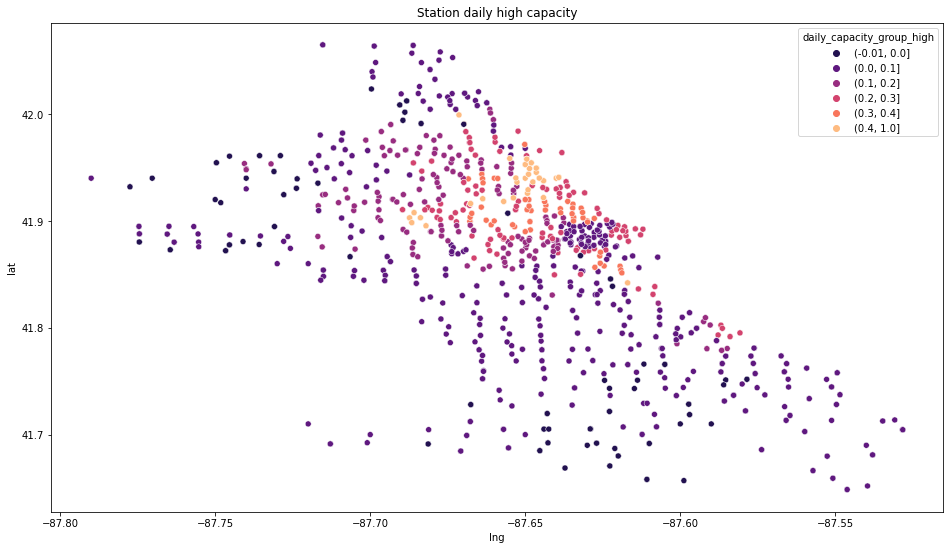

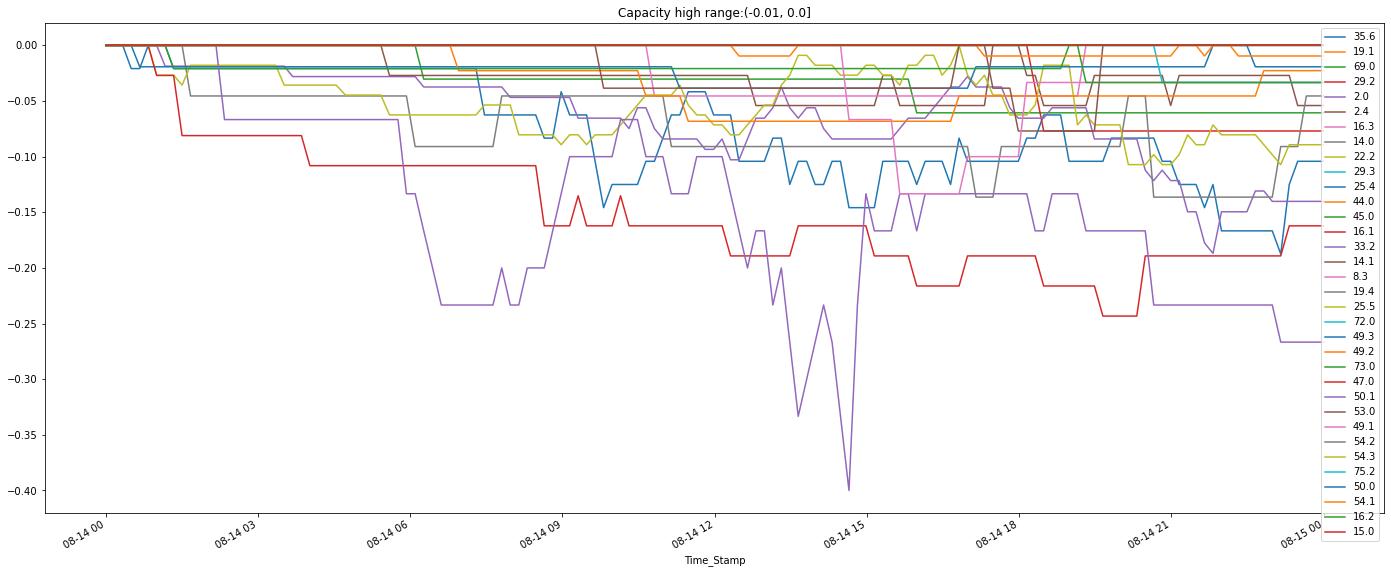

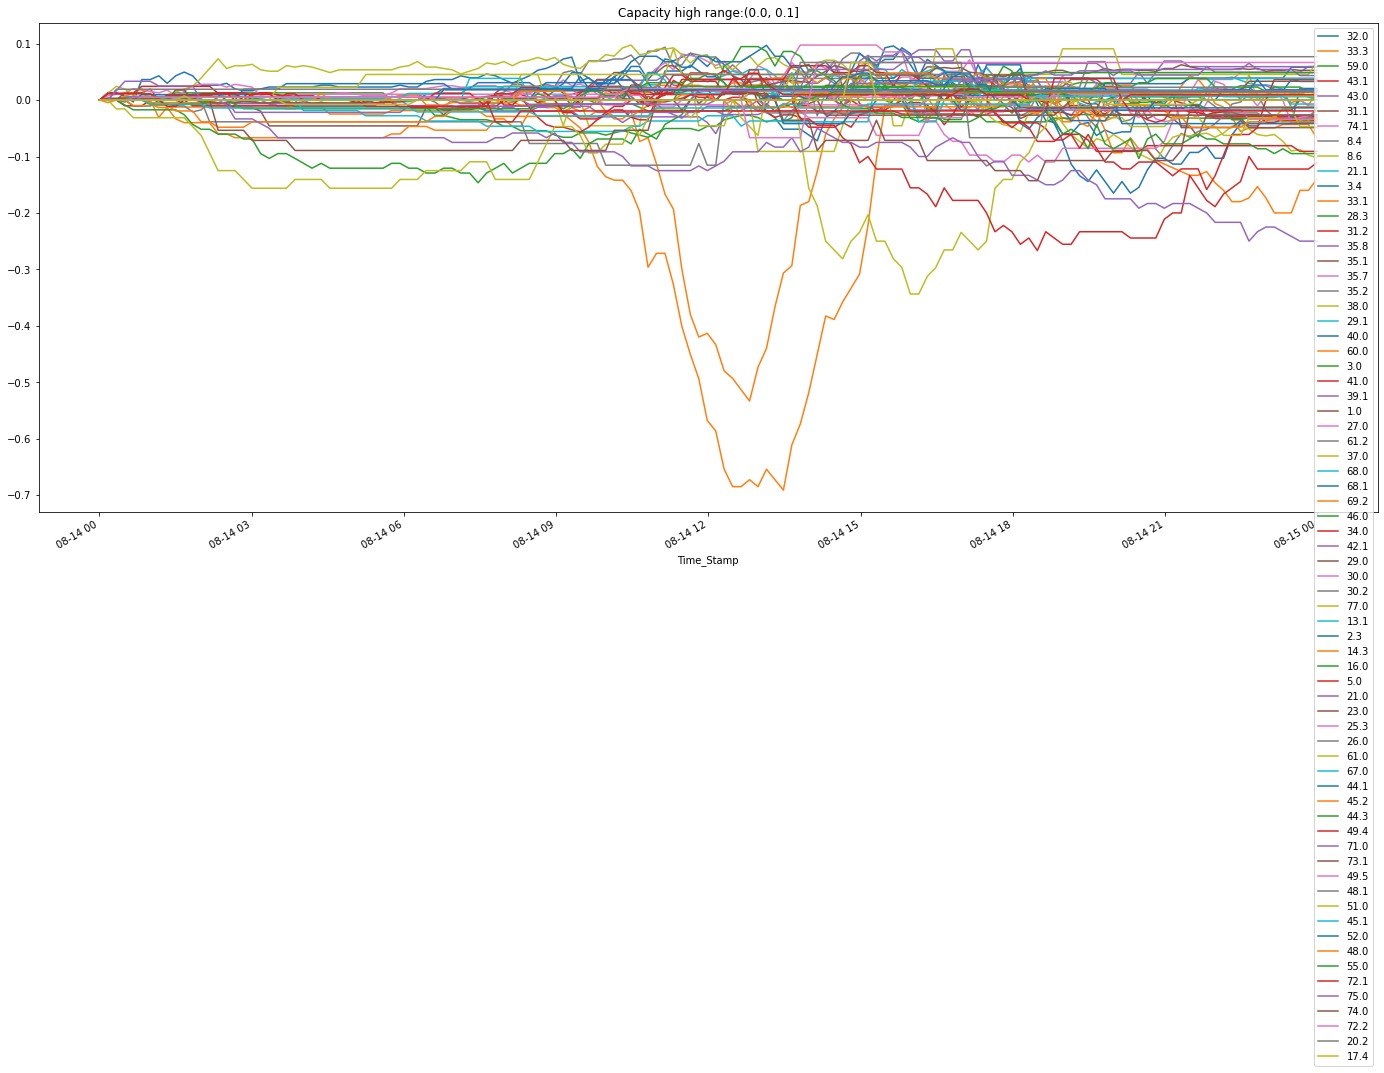

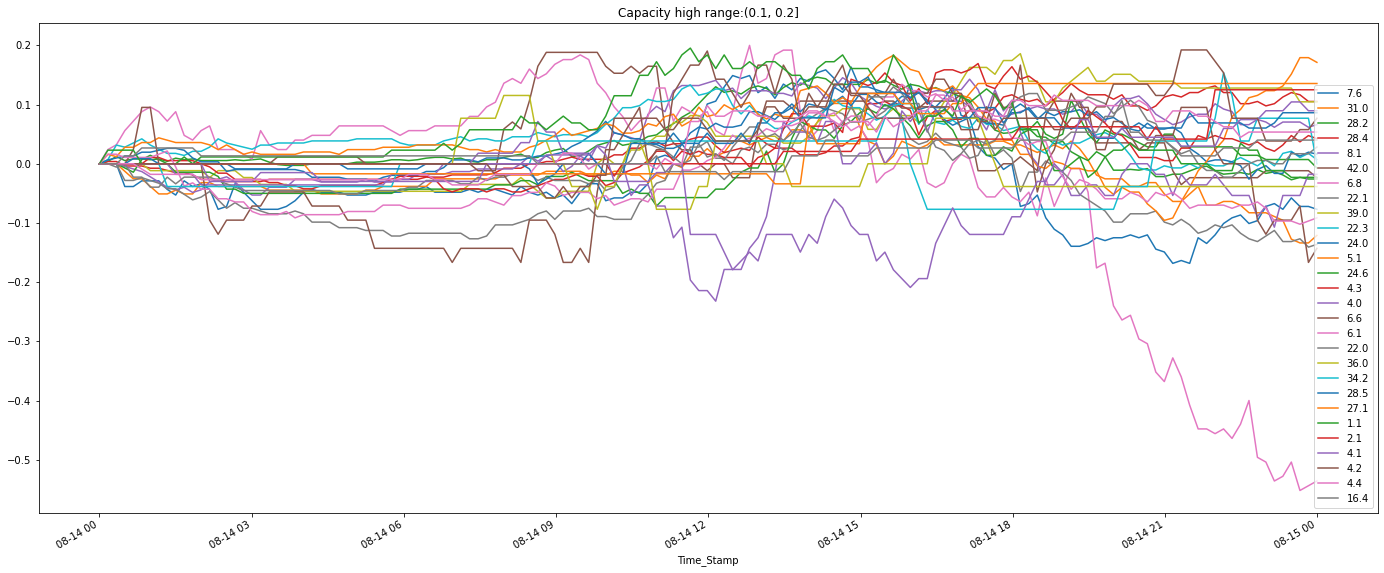

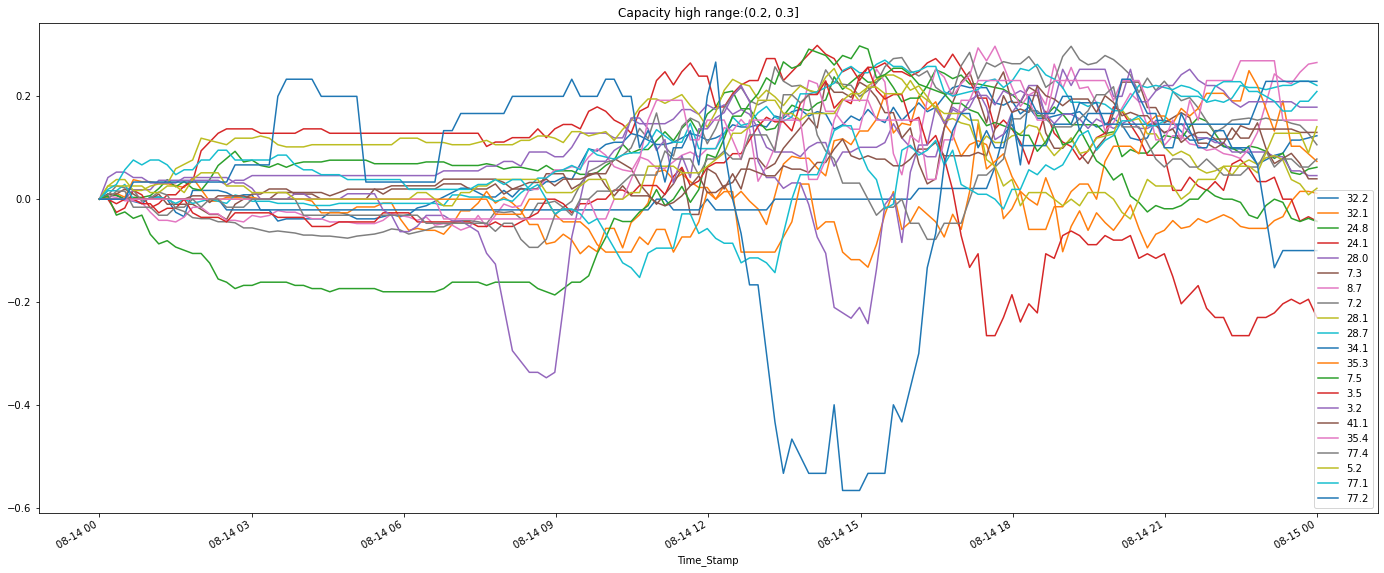

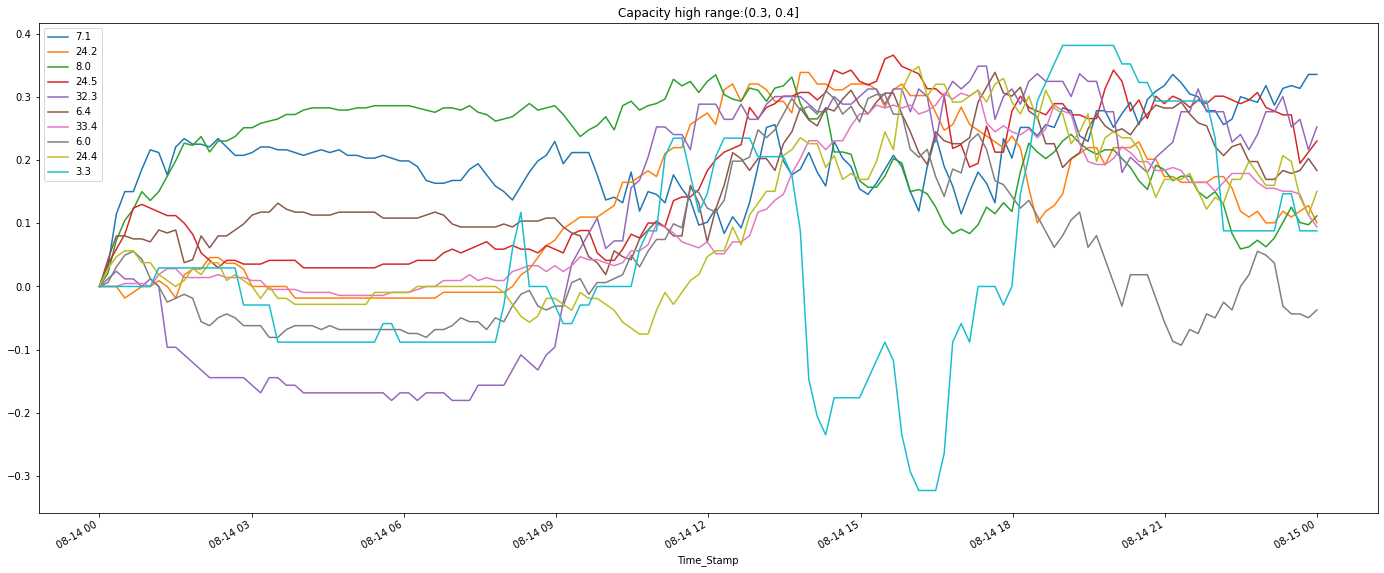

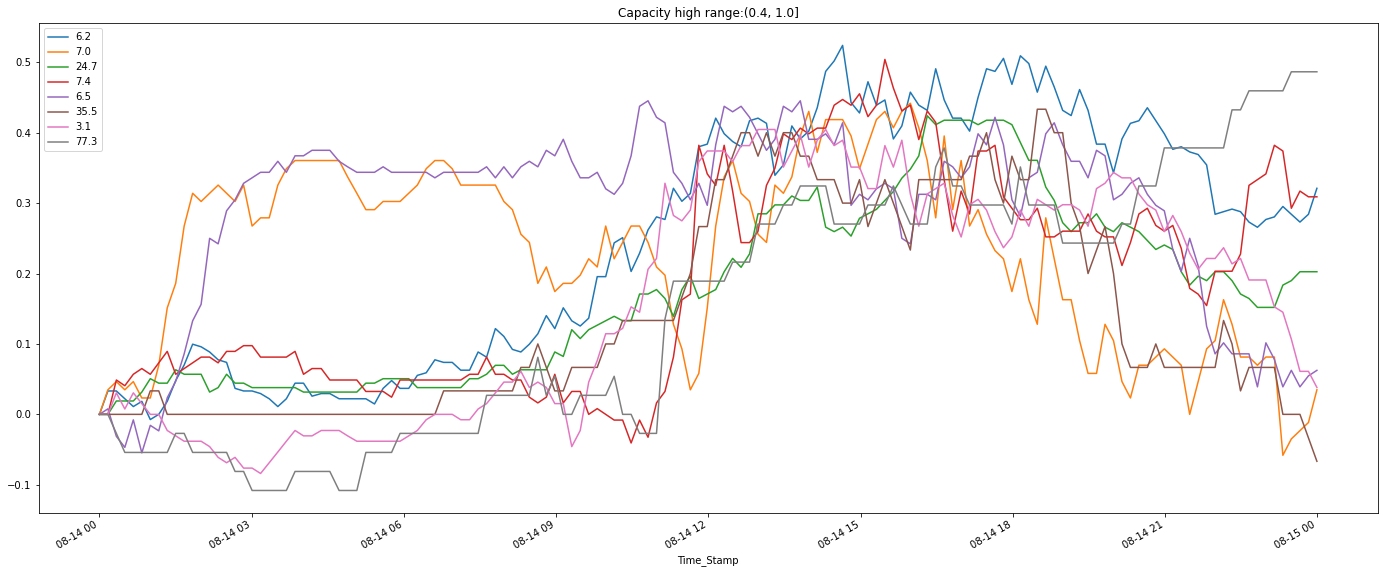

In [65]:
D.Capacity_high_dataviz(palette ='magma')

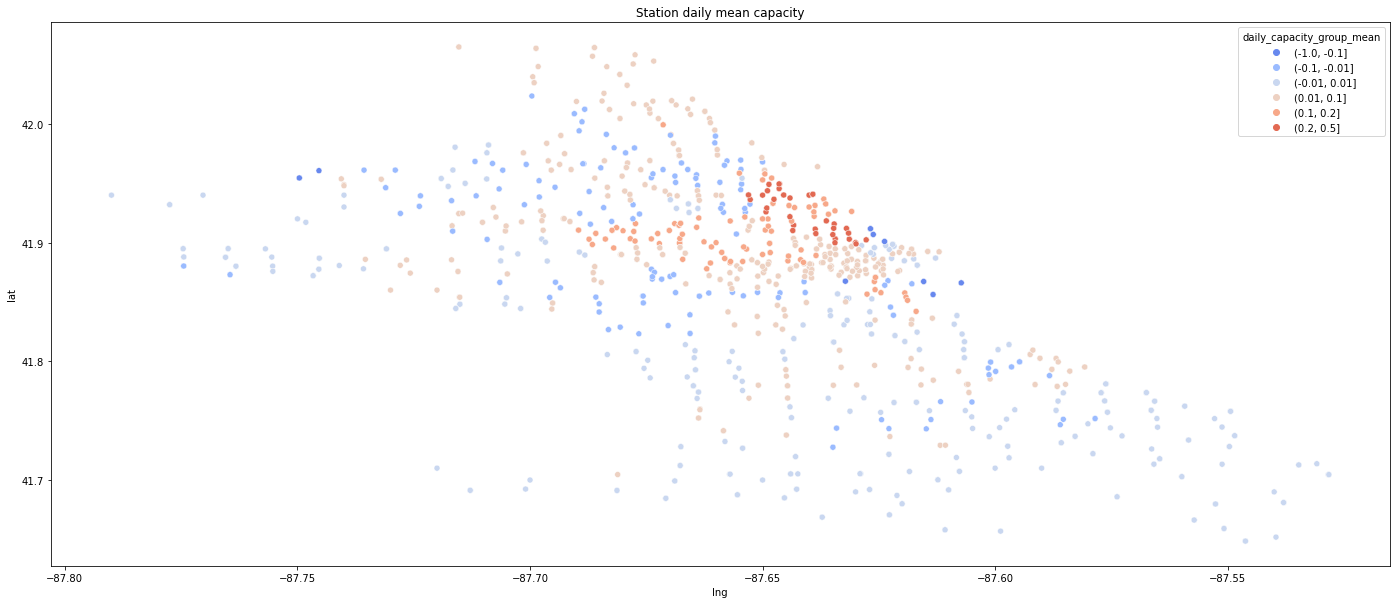

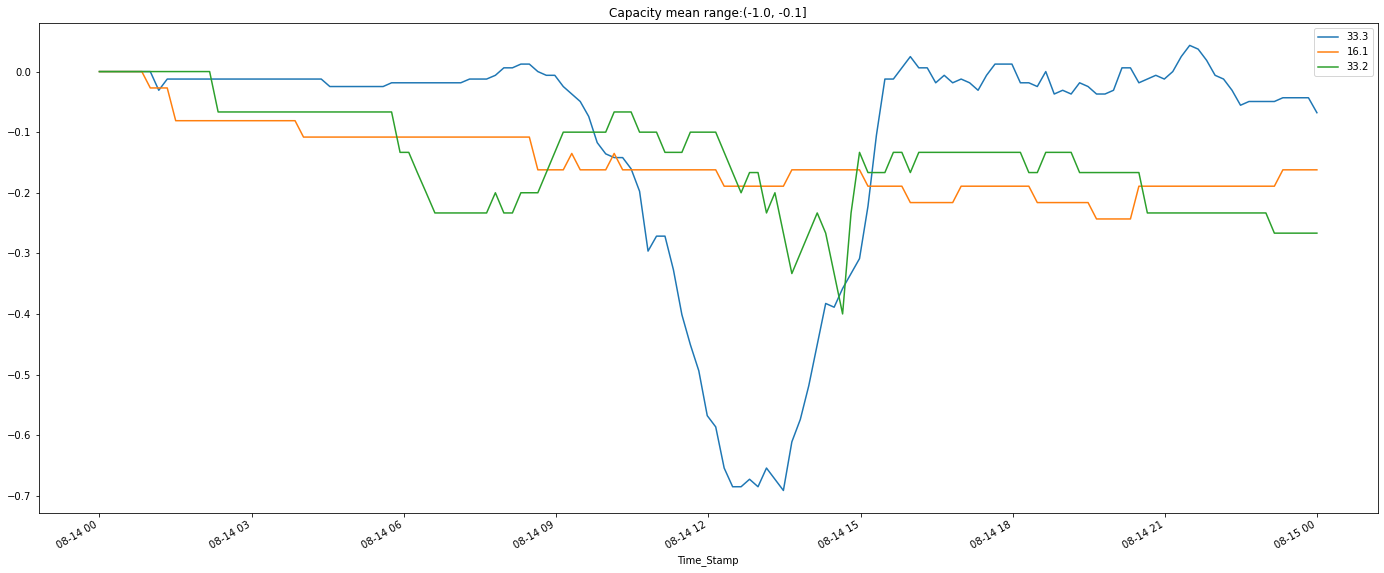

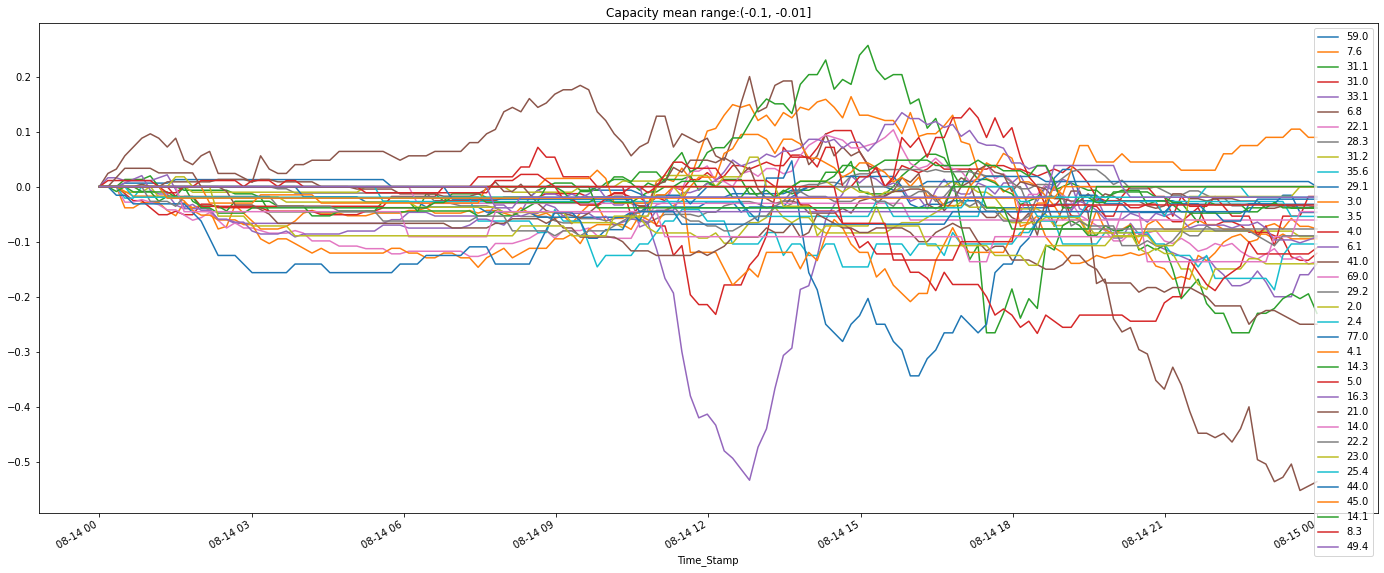

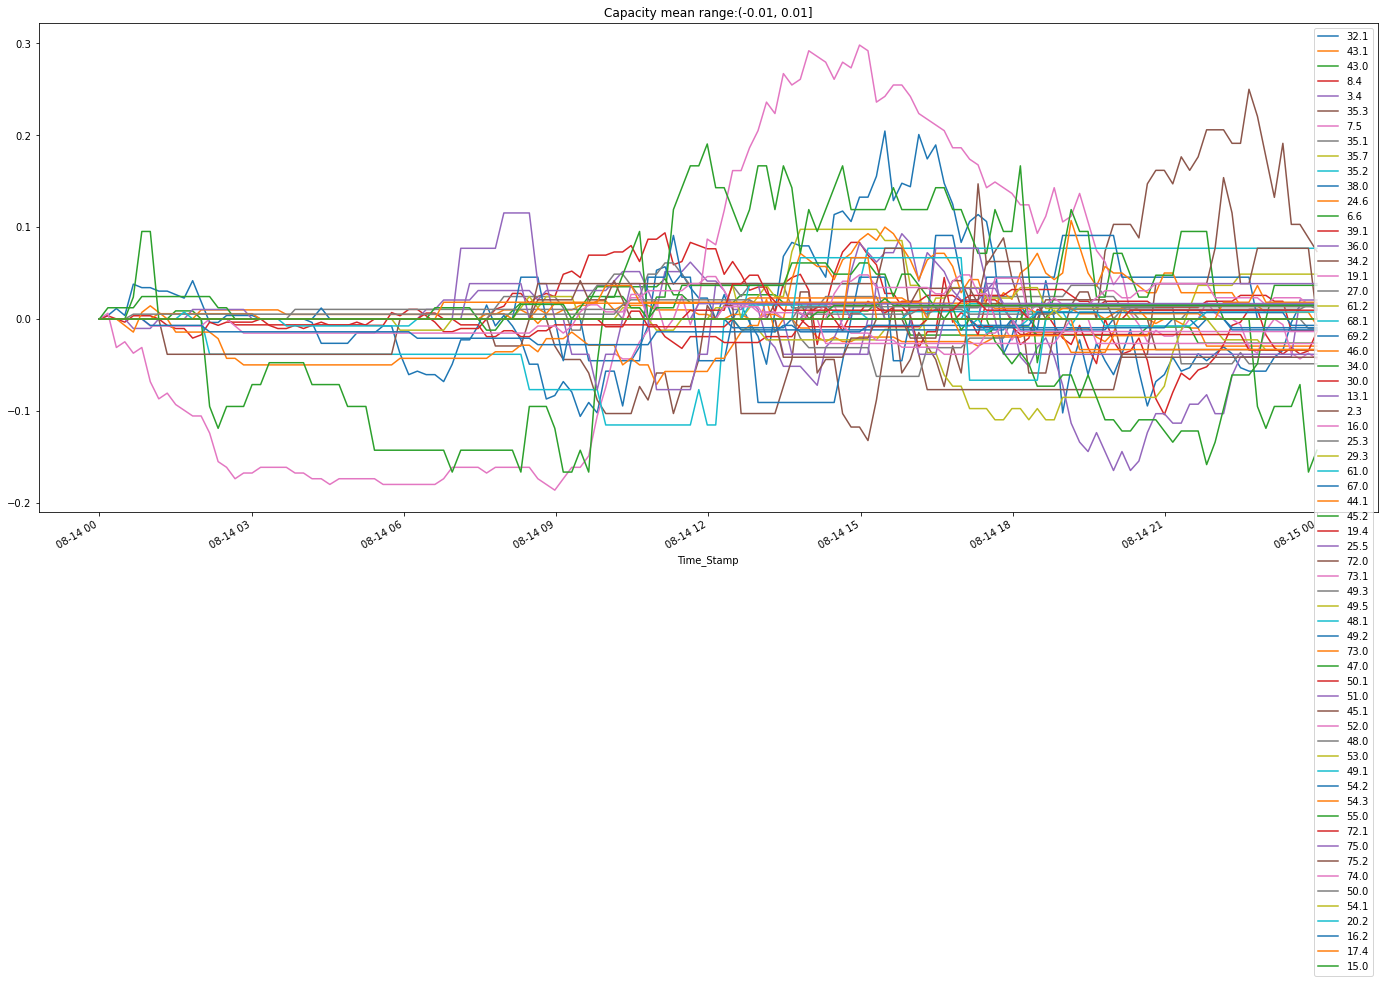

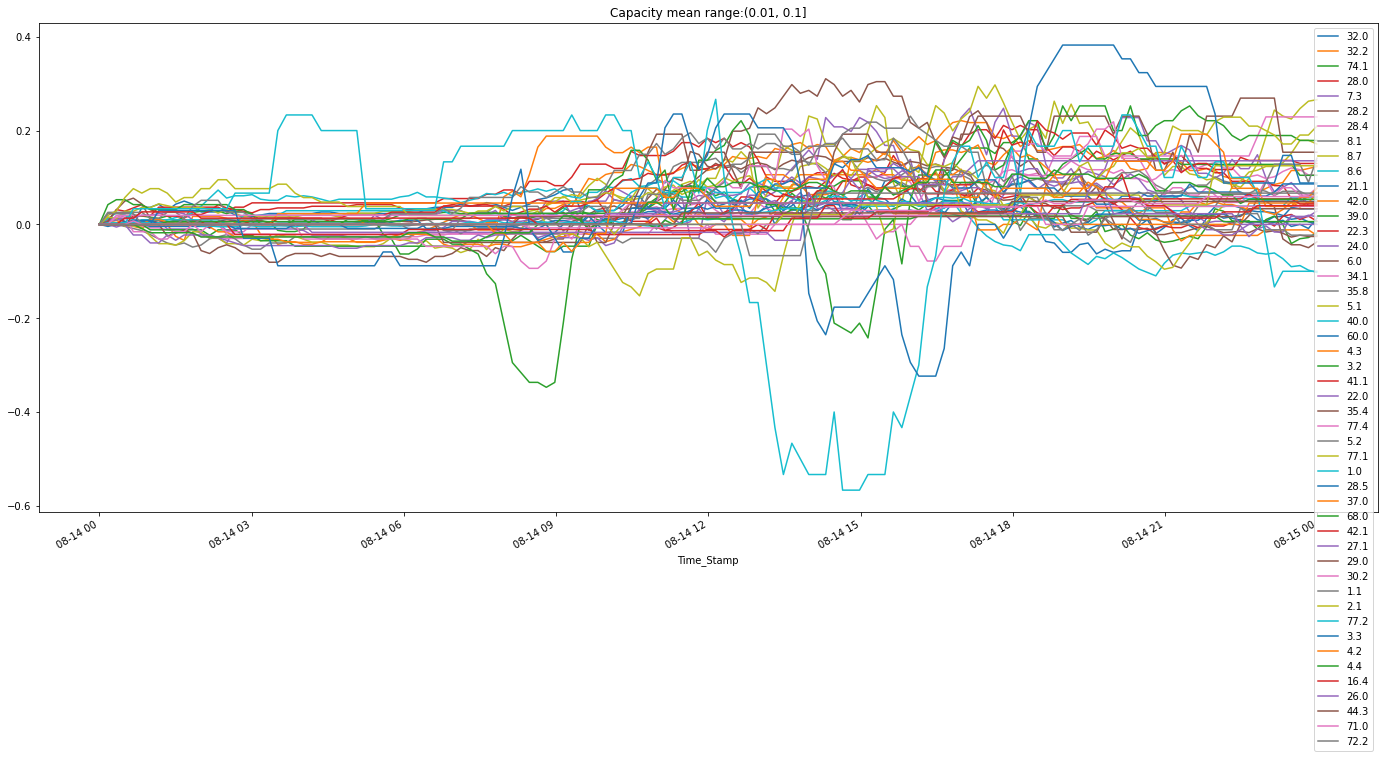

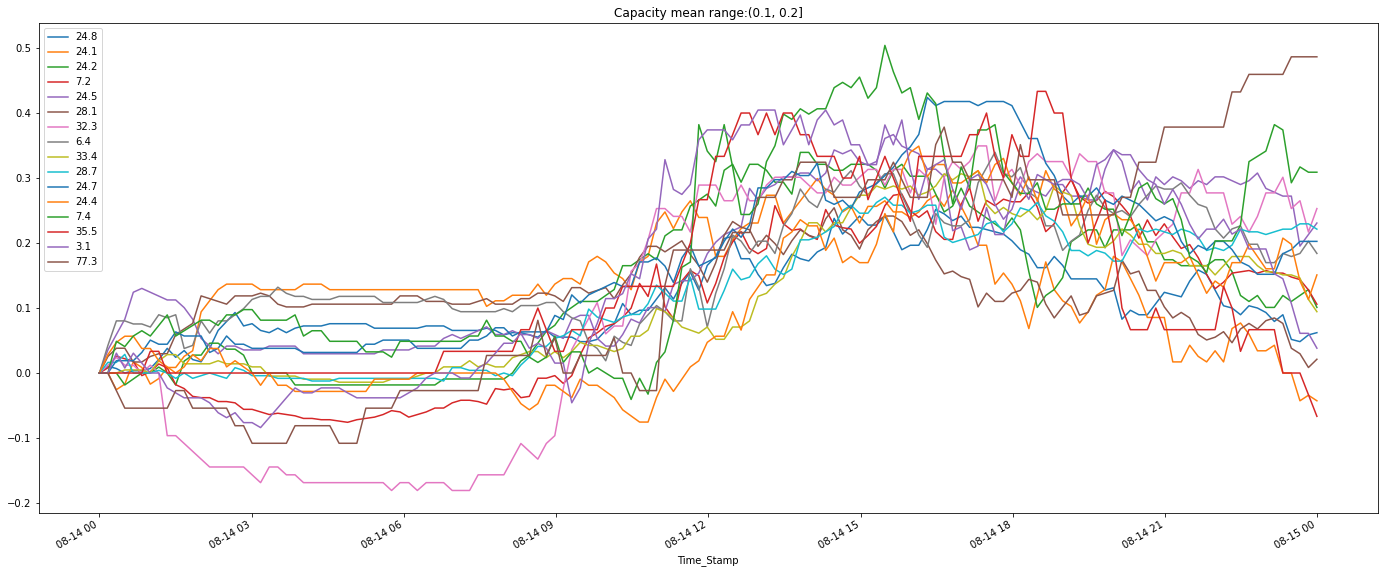

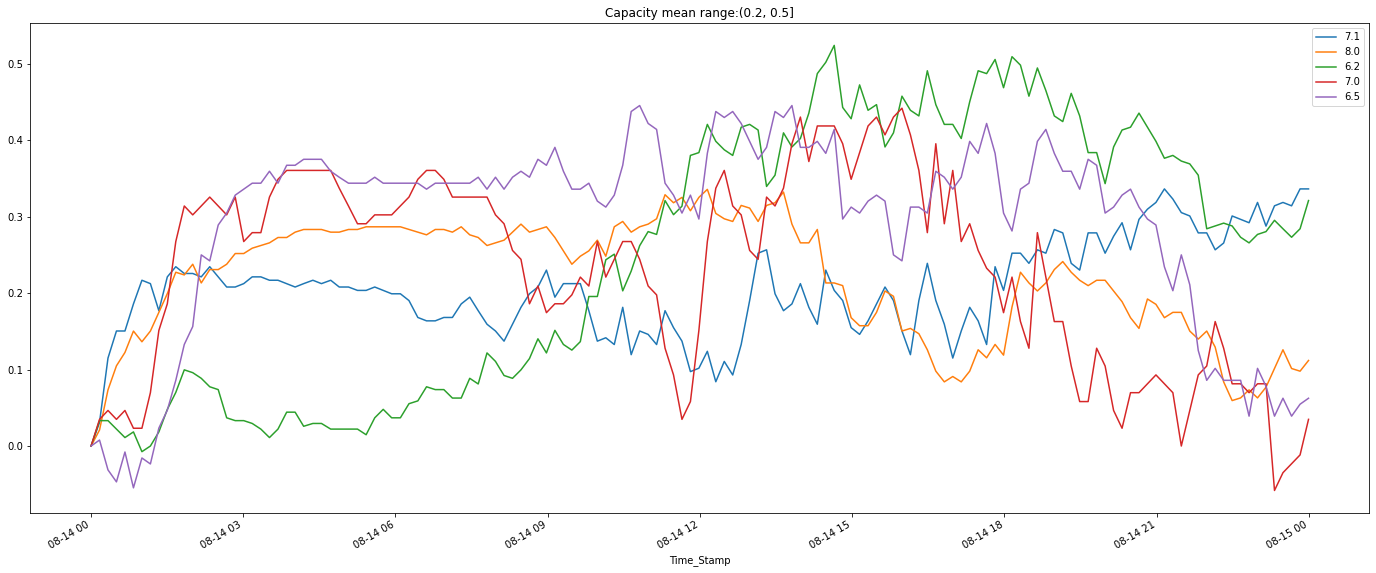

In [66]:
D.Capacity_mean_dataviz()

# Analysis and Aggregate data from several days

In [54]:
def Flat_Capacity(date,D):
    temp = D.Capacity_Analysis()[['Nbh_id','daily_capacity_high','daily_capacity_mean']].groupby(['Nbh_id']).mean()
    t_high = temp[['daily_capacity_high']].T.rename(columns = {id:f'{id}_high' for id in temp.index})
    t_high['date'] = date
    t_high = t_high.set_index('date')
    #
    t_mean = temp[['daily_capacity_mean']].T.rename(columns = {id:f'{id}_mean' for id in temp.index})
    t_mean['date'] = date
    t_mean = t_mean.set_index('date')
    #Agg
    return pd.concat([t_high,t_mean],axis=1)

In [52]:
DATEs = random.choices(df_dv_trips.date.unique(),k=4*20)
print(DATEs)

['2021-03-04', '2021-03-06', '2019-10-08', '2020-07-26', '2020-07-10', '2020-02-25', '2020-09-29', '2019-10-08', '2019-09-11', '2020-11-29', '2020-06-28', '2020-04-04', '2021-03-23', '2021-02-26', '2020-04-02', '2020-05-05', '2019-12-21', '2020-07-09', '2019-12-28', '2021-06-09', '2020-12-13', '2020-08-07', '2021-05-27', '2020-04-08', '2021-01-16', '2020-04-19', '2021-02-04', '2019-12-05', '2020-11-20', '2020-06-27', '2020-09-23', '2019-09-17', '2020-09-04', '2021-08-17', '2019-11-07', '2021-06-14', '2021-05-06', '2021-08-05', '2020-11-29', '2019-09-06', '2021-08-10', '2020-04-11', '2021-03-26', '2021-07-09', '2021-07-01', '2021-06-29', '2019-09-07', '2020-05-02', '2021-01-25', '2020-09-10', '2020-10-08', '2019-09-12', '2020-07-08', '2021-03-21', '2020-12-03', '2021-07-15', '2020-01-11', '2020-01-19', '2020-06-11', '2020-07-02', '2021-06-30', '2020-08-07', '2021-08-06', '2021-02-28', '2021-06-16', '2021-05-20', '2021-02-24', '2021-07-23', '2020-01-18', '2020-06-07', '2019-11-28', '2020

In [55]:
#DOCK_Dict = {}
Final_Capacity_df = pd.DataFrame()
for date in tqdm.tqdm(DATEs):
    trip_subset = df_dv_trips.query(f'date == "{date}"')
    trip_subset.head()
    #Initialize Class
    D = DOCKs(date,trip_subset,df_Station_final)
    D.Dock_Update()
    #DOCK_Dict[date] = D
    ################################
    Final_Capacity_df = pd.concat([Final_Capacity_df,Flat_Capacity(date,D)])
Final_Capacity_df.to_csv('Nbh_Capacity.csv')

100%|██████████| 80/80 [08:43<00:00,  6.55s/it]


In [56]:
Final_Capacity_df

Nbh_id,1.0_high,1.1_high,2.0_high,2.1_high,2.3_high,2.4_high,3.0_high,3.1_high,3.2_high,3.3_high,...,73.1_mean,74.0_mean,74.1_mean,75.0_mean,75.2_mean,77.0_mean,77.1_mean,77.2_mean,77.3_mean,77.4_mean
date,,,,,,,,,,,,,,,,,,,,,
2021-03-04,0.009885,0.034483,0.028037,0.020833,0.000000,0.000000,0.043103,0.122137,0.073684,0.088235,...,0.000000,0.000000,-0.021208,0.0,0.0,-0.031600,-0.003483,-0.000498,-0.010085,0.013176
2021-03-06,0.018122,0.160920,0.037383,0.020833,0.000000,0.000000,0.068966,0.267176,0.126316,0.323529,...,0.000000,0.000593,0.007218,0.0,0.0,-0.010532,-0.030194,-0.070617,-0.043644,-0.045255
2019-10-08,0.032949,0.034483,0.037383,0.041667,0.041667,0.189189,0.189655,0.374046,0.126316,0.088235,...,0.000000,0.000000,-0.296374,0.0,0.0,0.017522,0.166054,0.068095,0.106757,-0.022768
2020-07-26,0.056013,0.172414,0.093458,0.145833,0.145833,0.162162,0.224138,0.564885,0.063158,0.205882,...,0.000000,0.000000,0.025350,0.0,0.0,0.076158,0.045887,0.079720,0.019656,0.041193
2020-07-10,0.064250,0.068966,0.084112,0.041667,0.020833,0.000000,0.112069,0.396947,0.073684,0.323529,...,0.000000,0.000000,-0.090100,0.0,0.0,0.004322,-0.015603,0.011584,0.024919,0.090315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2020-09-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004115,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2021-02-06,0.001647,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.053435,0.031579,0.058824,...,0.000000,0.000000,0.003029,0.0,0.0,0.006138,-0.000595,0.002679,0.023166,0.001116


<AxesSubplot:>

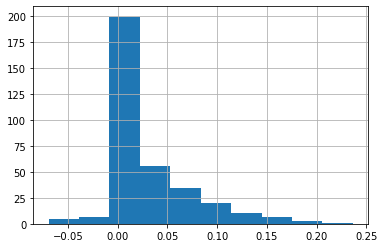

In [59]:
Final_Capacity_df.mean().hist()